#Аудиториска вежба 8: Neural Networks & Deep Learning

Neural networks are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Neural networks are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold.

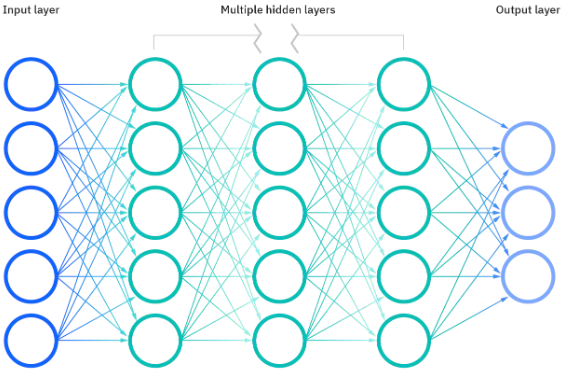

Neurons are the basic unit of a neural network.
When the artificial neuron activates, it
computes its state, by adding all the incoming
inputs multiplied by its corresponding
connection weight. But neurons always have
one extra input, the bias.

All neurons in a net are divided into three
groups:
1. Input neurons that receive information
from the outside world
2. Hidden neurons that process that
information
3. Output neurons that produce a
conclusion

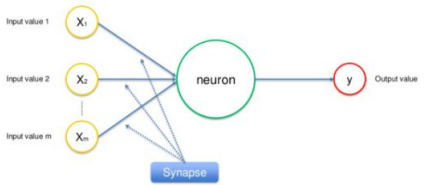

An activation function decides whether a neuron should be activated or not. This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations.

The role of the activation function is to derive output from a set of input values fed to a node (or a layer).

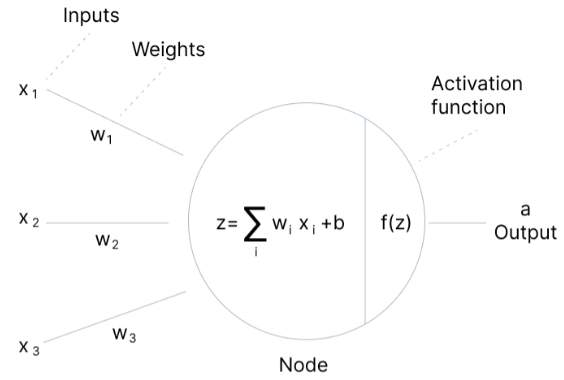

Gradient descent is a first-order iterative
optimization algorithm for finding the
minimum of a function.
To find a local minimum
of a function using gradient descent, one takes
steps proportional to the negative of the
gradient (or approximate gradient) of the
function at the current point.

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error.

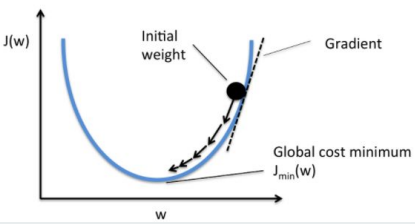

Backpropagation (backward propagation) is an
important mathematical tool for improving the
accuracy of predictions in data mining and
machine learning.

Essentially, backpropagation
is an algorithm used to calculate derivatives
quickly.

Artificial neural networks use
backpropagation as a learning algorithm to
compute a gradient descent with respect to
weights.
Desired outputs are compared to
achieved system outputs, and then the systems
are tuned by adjusting connection weights to
narrow the difference between the two as
much as possible. The algorithm gets its name
because the weights are updated backwards,
from output towards input.

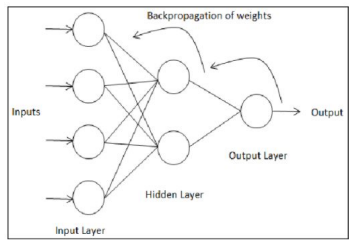

Keras is a powerful easy-to-use Python library
for developing and evaluating deep learning
models. It wraps the efficient numerical
computation libraries Theano and TensorFlow
and allows you to define and train neural
network models in a few short lines of code.

Training a neural network:

> Iteration - counter that increases
every time the neural network goes
through one training set. In other words,
this is the total number of training sets
completed by the neural network.

> Epoch - increases each time we go
through the entire set of training sets. The
more epochs there are, the better is the
training of the model.

> Batch size - equal to the number of
training examples in one
forward/backward pass. The higher the
batch size, the more memory space you’ll
need.

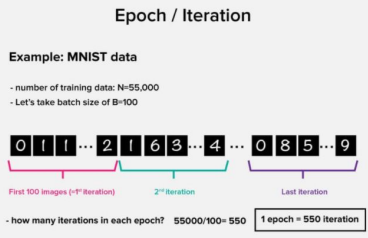

Error is a deviation that reflects the
discrepancy between expected and received
output. The error should become smaller after
every epoch. If this does not happen, then you
are doing something wrong.

Solving problems with NNs:

1. Classification - NNs label the data into classes
by implicitly analyzing its parameters. For
example, a neural network can analyse the
parameters of a bank client such as age,
solvency, credit history and decide whether to
loan them money.

2. Prediction - The algorithm has the ability to
make predictions. For example, it can foresee
the rise or fall of a stock based on the situation
in the stock market.

3. Recognition - This is currently the widest
application of neural networks. For example, a
security system can use face recognition to
only let authorized people into the building.

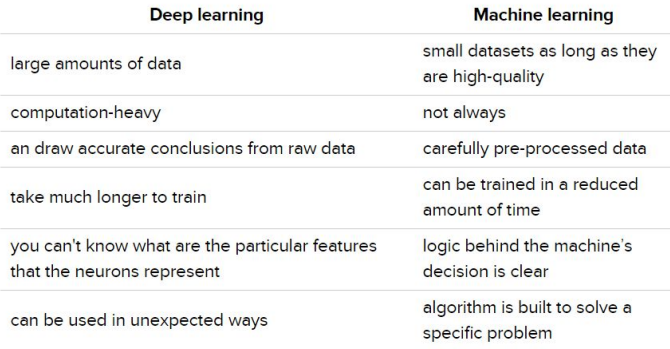

## Requirements

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

## <font color='pink'>Classification with Neural Networks<font>

In [64]:
!gdown 1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_

Downloading...
From: https://drive.google.com/uc?id=1CLbFWeDiYMLKQcHVlZ0_tPeKYXtKEfK_
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 42.0MB/s]


In [65]:
df = pd.read_csv('heart.csv')

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

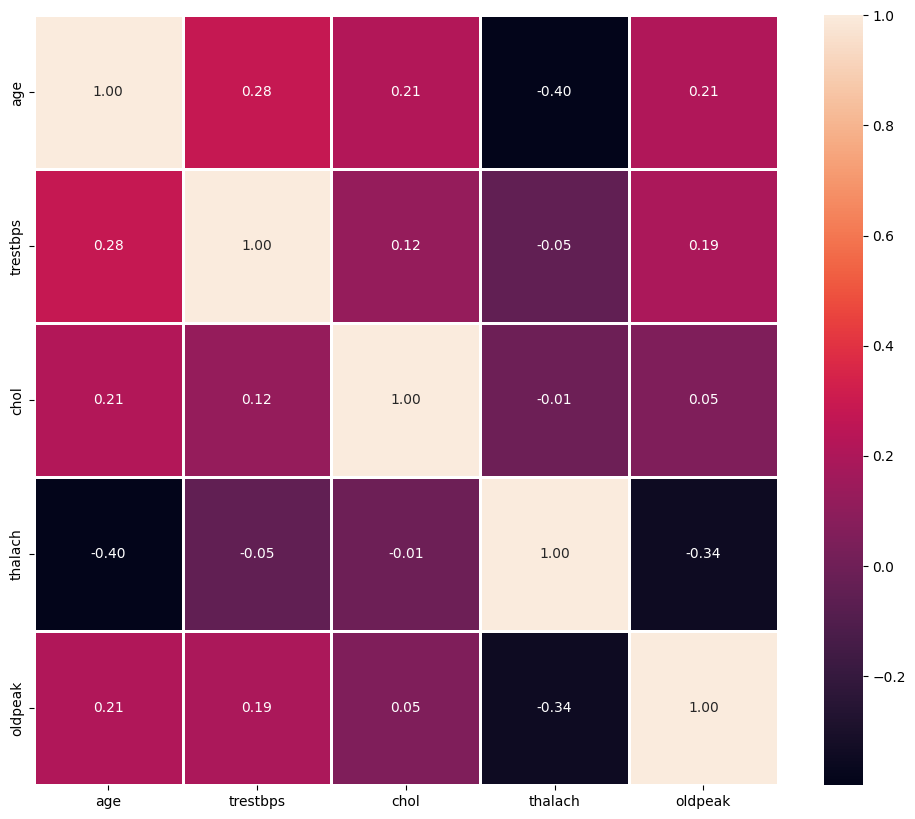

In [68]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='target', ylabel='count'>

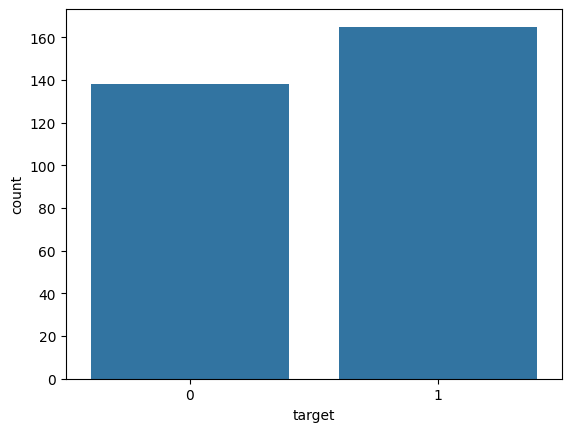

In [69]:
sns.countplot(df, x="target")

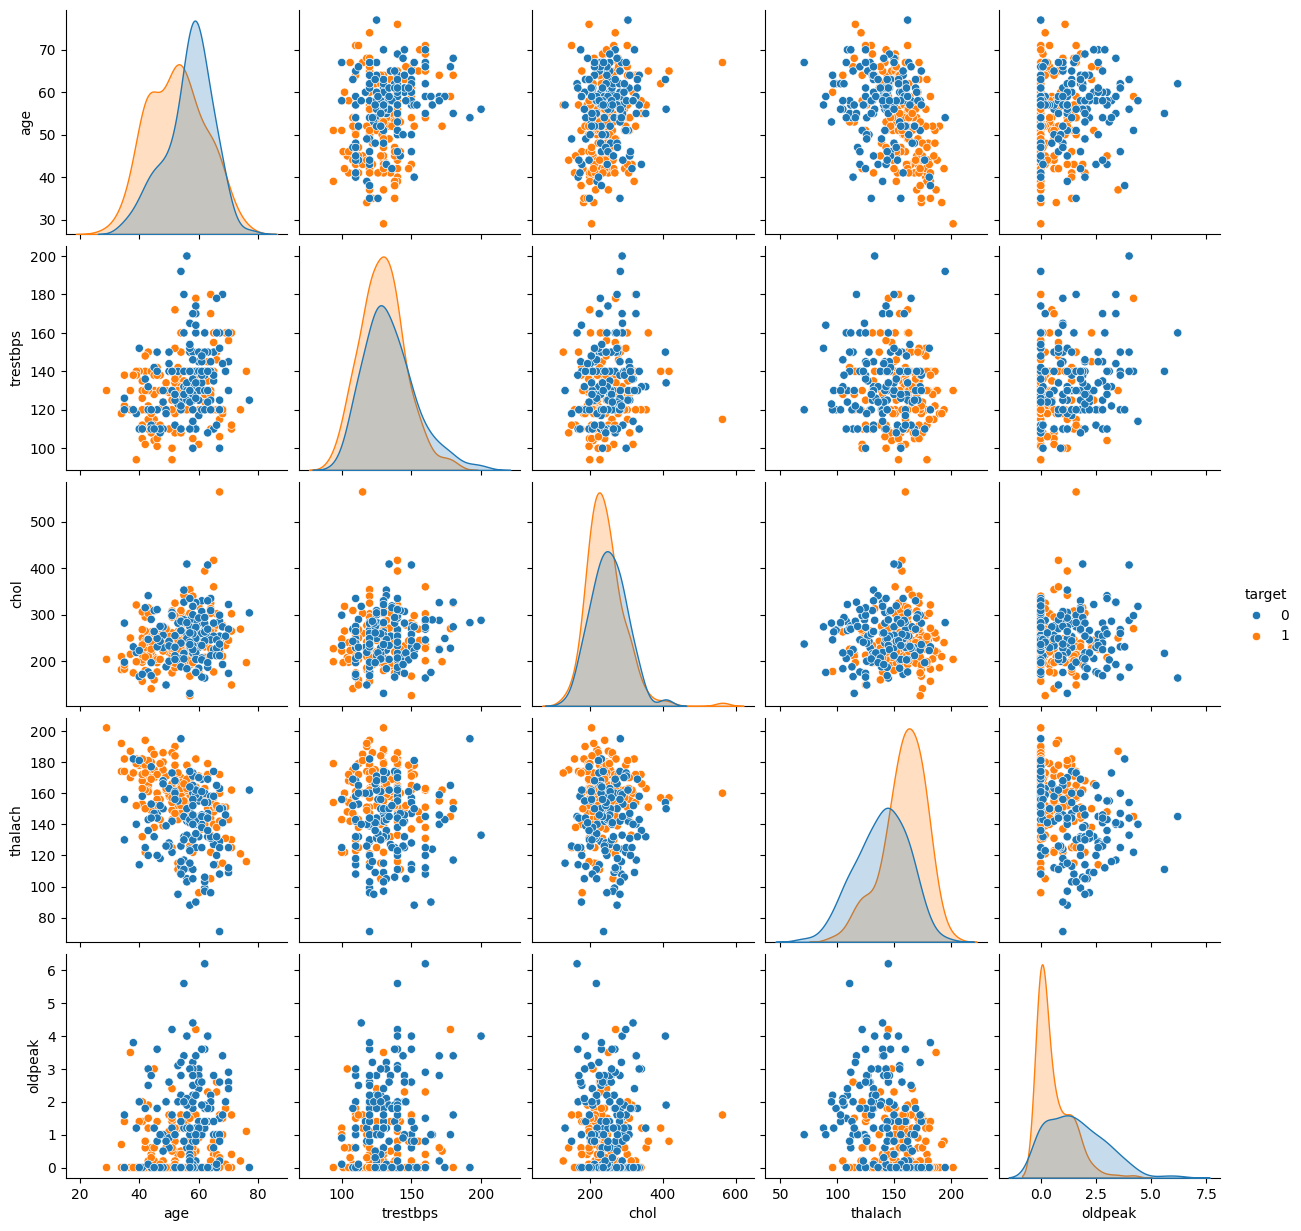

In [70]:
sns.pairplot(df, vars=numerical_features, hue="target")

In [71]:
X, y = df.drop(columns=["target"]), df["target"]

In [72]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [74]:
X.shape[1]

13

In [102]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="sigmoid"),
])

In [103]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [104]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=64, batch_size=8)

Epoch 1/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5600 - val_loss: 0.6928
Epoch 2/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5106 - loss: 0.6927 - val_accuracy: 0.5600 - val_loss: 0.6907
Epoch 3/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6228 - loss: 0.6889 - val_accuracy: 0.8400 - val_loss: 0.6817
Epoch 4/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.6764 - val_accuracy: 0.7600 - val_loss: 0.6496
Epoch 5/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7890 - loss: 0.6349 - val_accuracy: 0.8400 - val_loss: 0.5680
Epoch 6/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.5435 - val_accuracy: 0.8400 - val_loss: 0.4609
Epoch 7/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.4705 - val_accuracy: 0.8000 - val_loss: 0.4113
Epoch 8/64
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.4217 - val_accuracy: 0.8400 - val_loss

<Axes: >

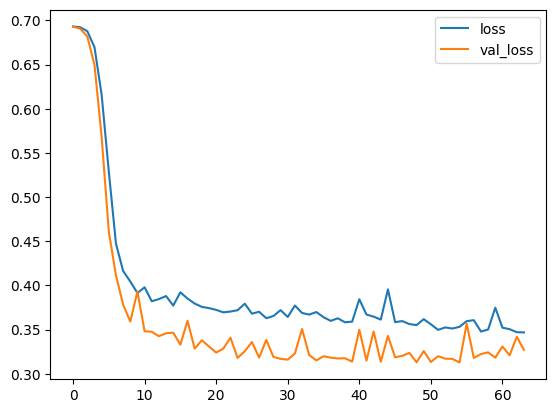

In [106]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [107]:
pred_y = model.predict(test_X).round()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


<Axes: >

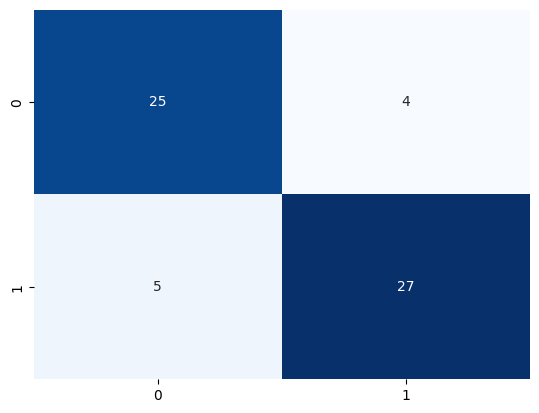

In [108]:
cm = confusion_matrix(test_y, pred_y)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [109]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Now, we can compare the performance of the Neural Network with the XGBoost model, on the same dataset.

In [110]:
classifier = XGBClassifier(n_estimators=50, learning_rate=0.01)

In [111]:
classifier.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
pred_y = classifier.predict(test_X)

In [113]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## <font color='orange'>Regression with Neural Networks<font>

In [114]:
!gdown 11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H

Downloading...
From: https://drive.google.com/uc?id=11FY9LQJzXo7mdcwksL_U7BlRaywI6Y2H
To: /content/Admission_Predict.csv
100% 12.9k/12.9k [00:00<00:00, 45.8MB/s]


In [115]:
df = pd.read_csv('Admission_Predict.csv')

In [116]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [117]:
df.drop(columns=["Serial No."], inplace=True)

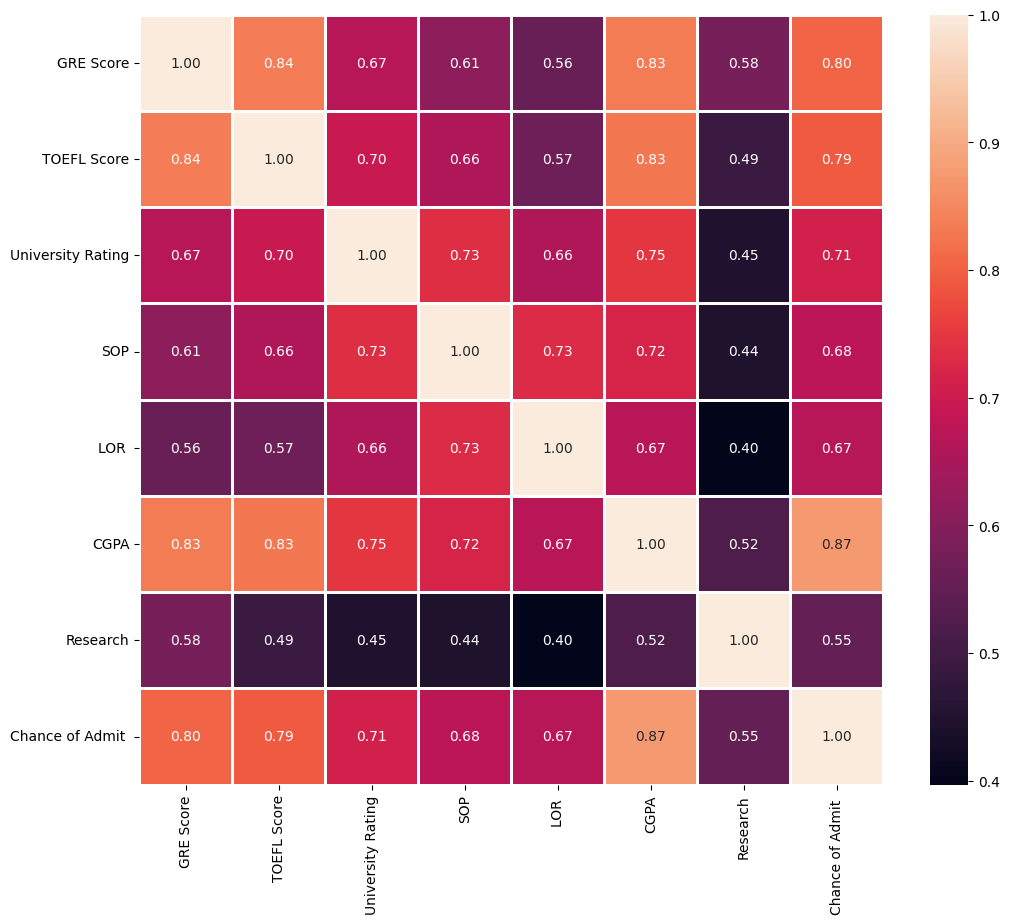

In [118]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

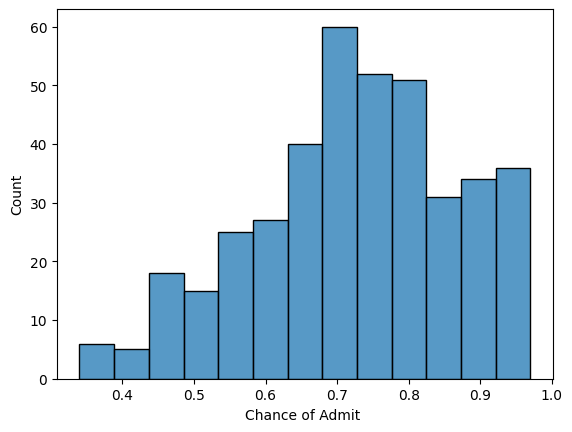

In [119]:
sns.histplot(df, x="Chance of Admit ")

In [120]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [121]:
X.shape[1]

13

In [136]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])

In [137]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [139]:
history = model.fit(train_X, train_y, validation_split=0.1, epochs=32, batch_size=8)

Epoch 1/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.5276 - mean_squared_error: 0.5276 - val_loss: 0.4472 - val_mean_squared_error: 0.4472
Epoch 2/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3592 - mean_squared_error: 0.3592 - val_loss: 0.2468 - val_mean_squared_error: 0.2468
Epoch 3/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2321 - mean_squared_error: 0.2321 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 4/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2352 - mean_squared_error: 0.2352 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 5/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 6/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1579 - mean_squared_error: 0.1579 - val_loss: 0.1263 - val_mean_squared_error: 0.1263
Epoch 7/32
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1396 - mean_squared_error: 0.1396 - val_loss: 0.1207 - val_mean

<Axes: >

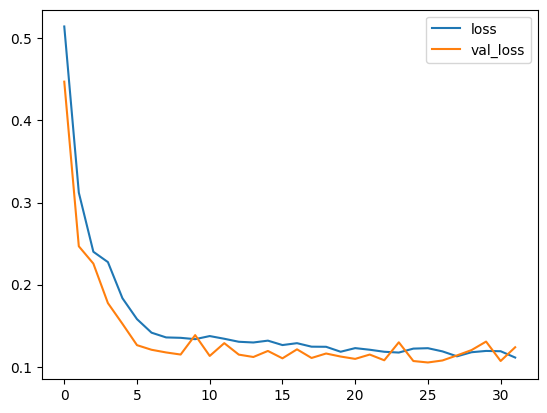

In [140]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [141]:
pred_y = model.predict(test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [142]:
r2_score(test_y, pred_y)

0.45867329835891724